<a href="https://colab.research.google.com/github/KSreeChandana/task_7/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("trainKNN.txt",header = None) 
train.columns = ['ID_no', 'Refractive_index', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']
train.to_csv('trainKNN.csv',index = None)
test = pd.read_csv("testKNN.txt",header = None) 
test.columns = ['ID_no', 'Refractive_index', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']
test.to_csv('testKNN.csv',index = None)

In [5]:
glasses = pd.concat([train,test],axis =0, ignore_index= True)

In [6]:
glasses.shape

(214, 11)

In [7]:
glasses.head()

,ID_no,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
glasses.drop(["ID_no"],axis=1,inplace=True)

In [9]:
glasses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_index  214 non-null    float64
 1   Na                214 non-null    float64
 2   Mg                214 non-null    float64
 3   Al                214 non-null    float64
 4   Si                214 non-null    float64
 5   K                 214 non-null    float64
 6   Ca                214 non-null    float64
 7   Ba                214 non-null    float64
 8   Fe                214 non-null    float64
 9   Glass_type        214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
glasses.describe()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glasses['Glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

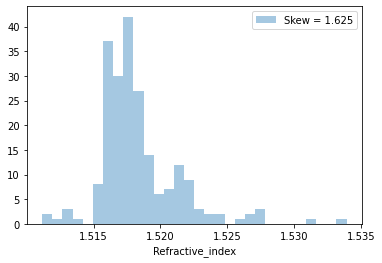

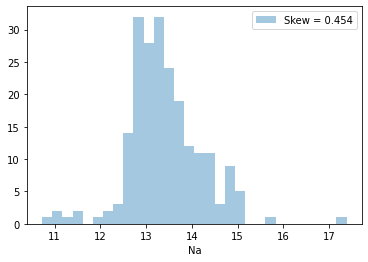

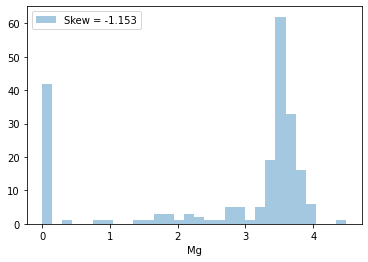

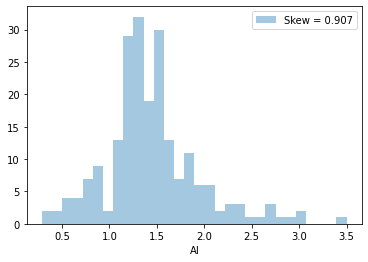

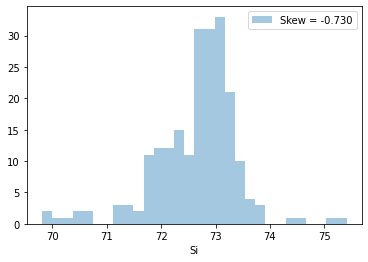

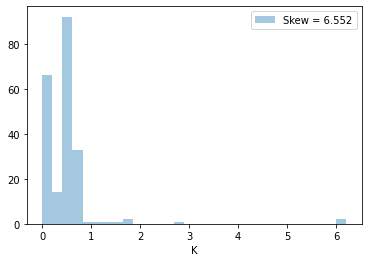

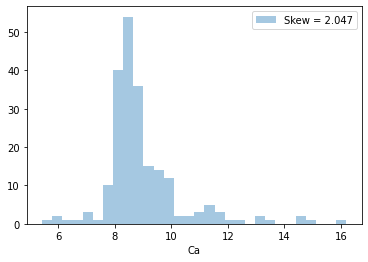

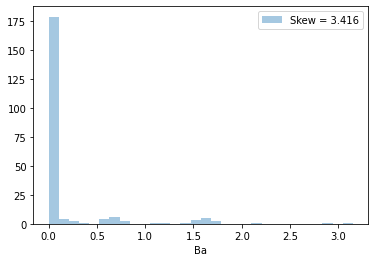

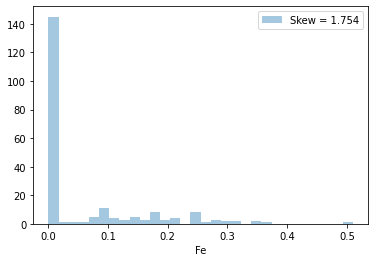

In [12]:
features = glasses.columns[:-1].tolist()
for feat in features:
    skew = glasses[feat].skew()
    sns.distplot(glasses[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [13]:
glasses[features]

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0
210,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


<Figure size 576x576 with 0 Axes>

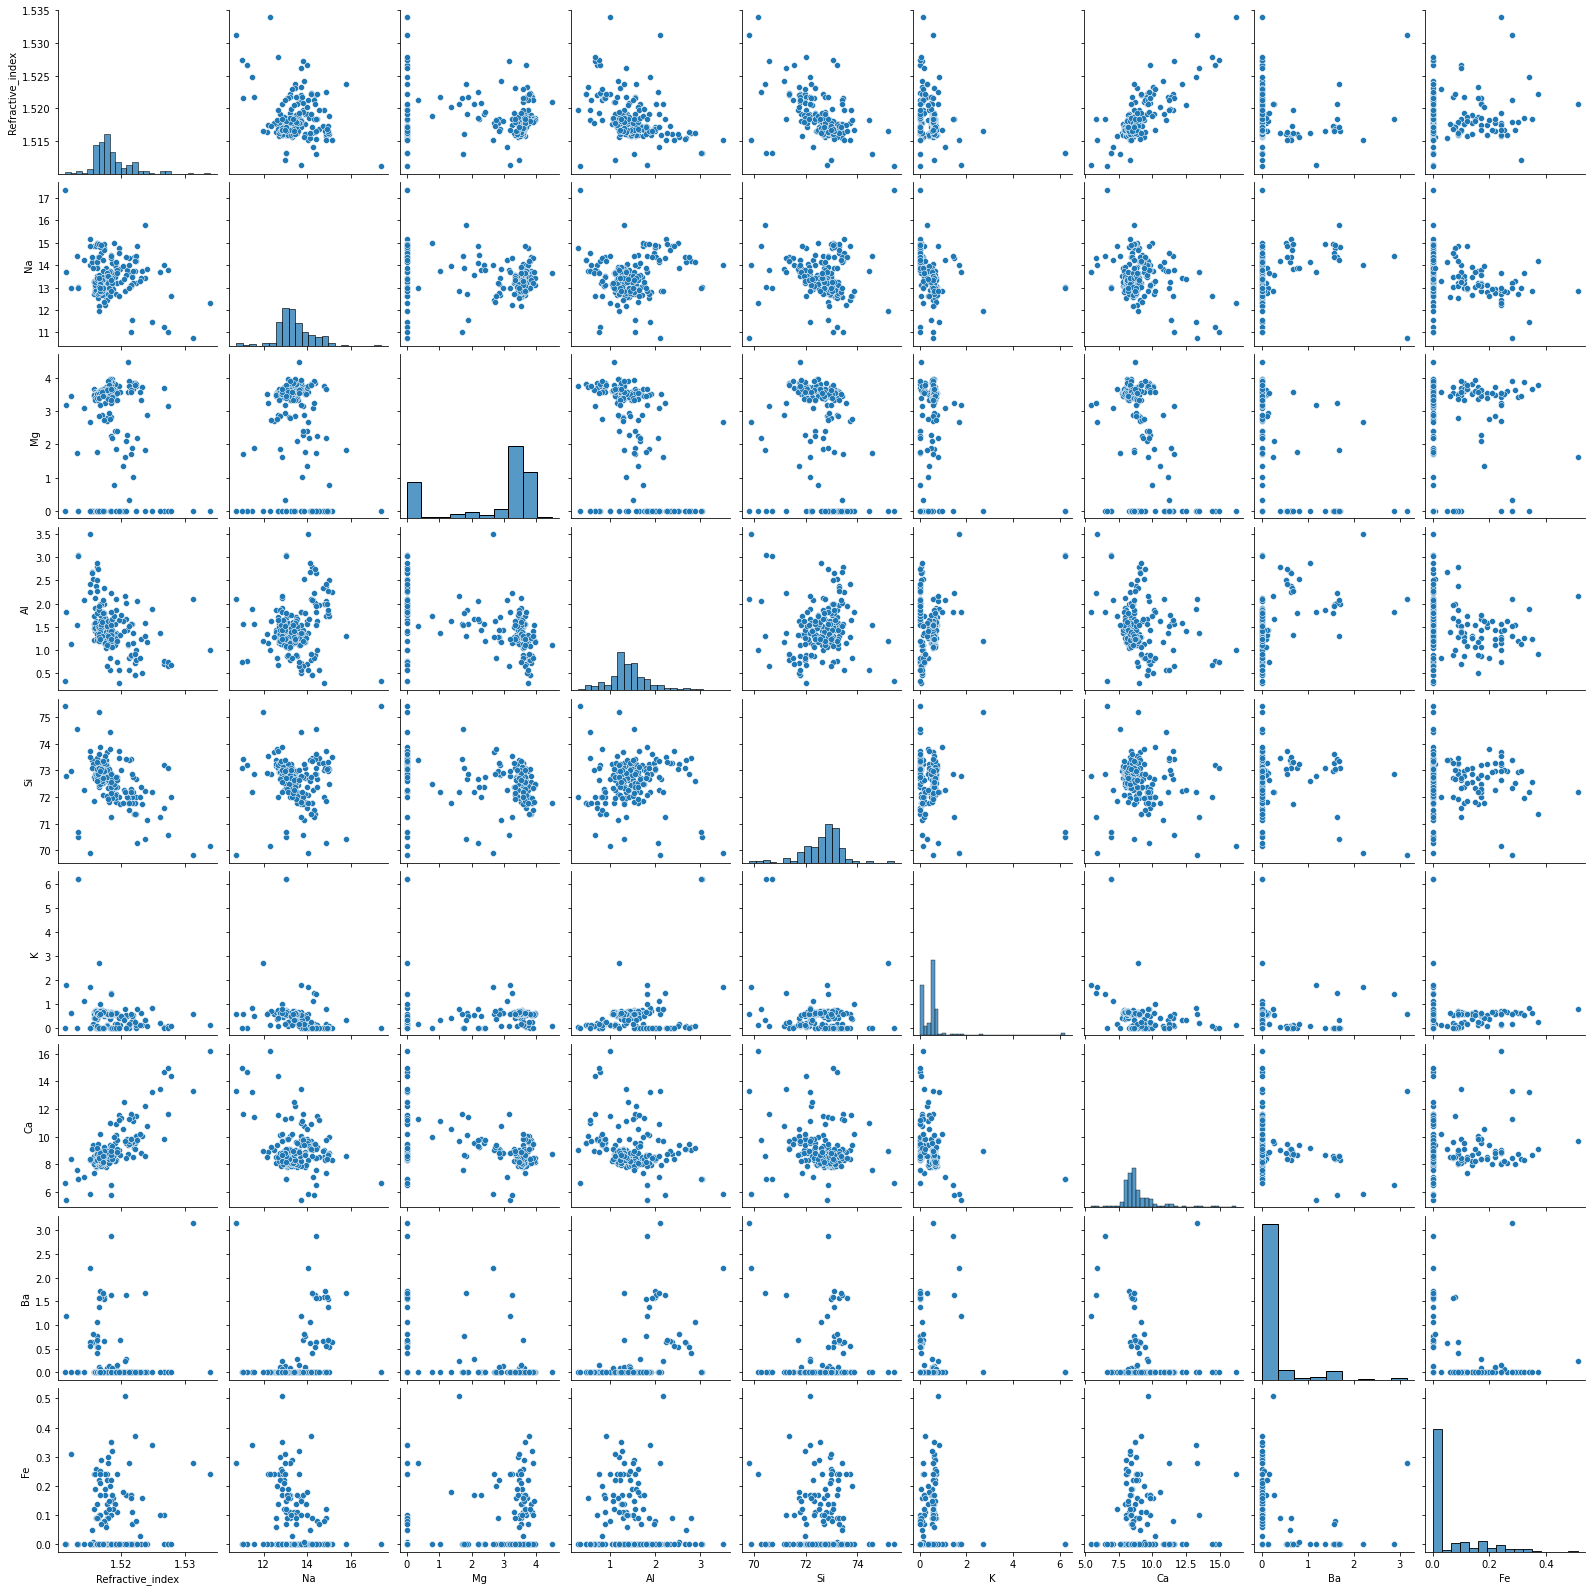

In [14]:
plt.figure(figsize=(8,8))
sns.pairplot(glasses[features],palette='coolwarm')
plt.show()

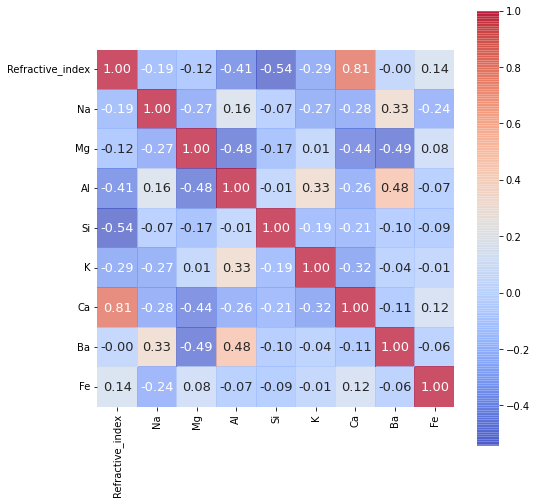

In [15]:
corr = glasses[features].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [16]:
glasses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_index  214 non-null    float64
 1   Na                214 non-null    float64
 2   Mg                214 non-null    float64
 3   Al                214 non-null    float64
 4   Si                214 non-null    float64
 5   K                 214 non-null    float64
 6   Ca                214 non-null    float64
 7   Ba                214 non-null    float64
 8   Fe                214 non-null    float64
 9   Glass_type        214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [17]:
from collections import Counter
def outlier_hunt(glasses):

    outlier_indices = []
    for col in glasses.columns.tolist():
        Q1 = np.percentile(glasses[col], 25)
        Q3 = np.percentile(glasses[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = glasses[(glasses[col] < Q1 - outlier_step) | (glasses[col] > Q3 + outlier_step )].index 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return multiple_outliers  
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glasses[features]))))

The dataset contains 14 observations with more than 2 outliers


In [18]:
outlier_indices = outlier_hunt(glasses[features])
df = glasses.drop(outlier_indices).reset_index(drop=True)

In [19]:
print(glasses.shape)

(214, 10)


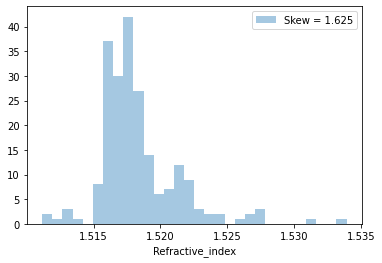

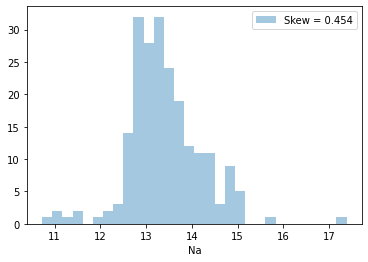

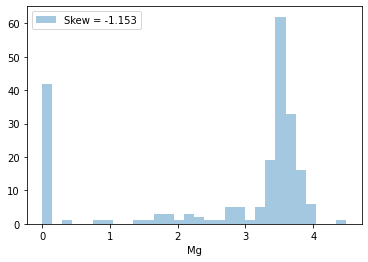

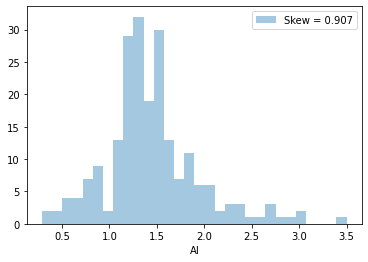

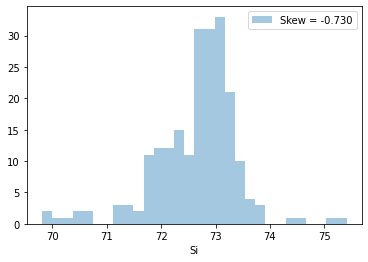

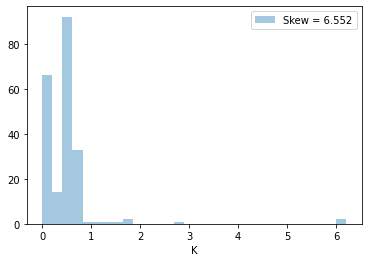

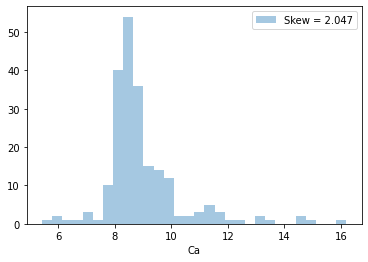

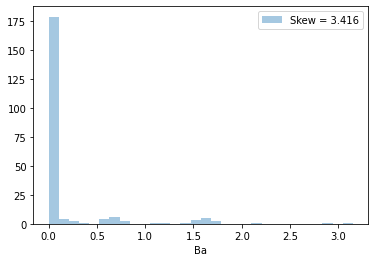

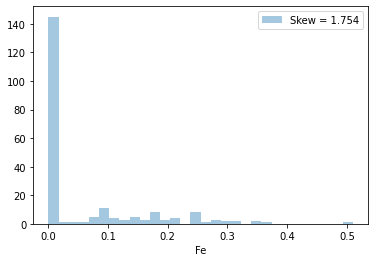

In [20]:
for feat in features:
    skew = glasses[feat].skew()
    sns.distplot(glasses[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [21]:
df['Glass_type'].value_counts()

1    70
2    70
7    25
3    17
5    10
6     8
Name: Glass_type, dtype: int64

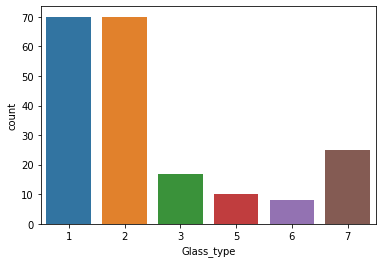

In [22]:
sns.countplot(df['Glass_type'])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X = glasses[features] 
y = glasses['Glass_type'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 7)

In [24]:
from scipy.stats import boxcox
features_boxcox = []
for feature in features:
    bc_transformed, _ = boxcox(glasses[feature]+1)  
    features_boxcox.append(bc_transformed)
features_boxcox = np.column_stack(features_boxcox)
glasses_bc = pd.DataFrame(data=features_boxcox, columns=features)
glasses_bc['Glass_type'] = df['Glass_type']

In [25]:
glasses.describe()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


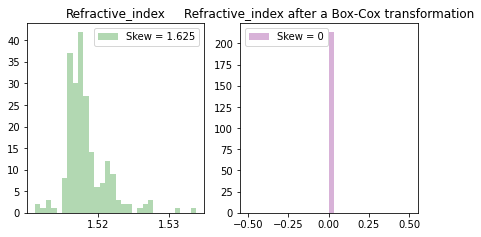

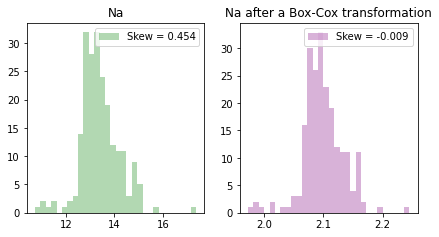

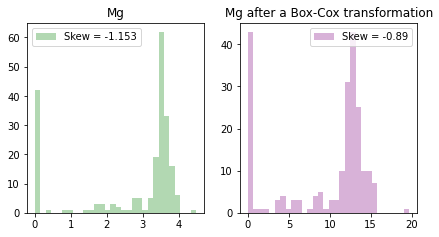

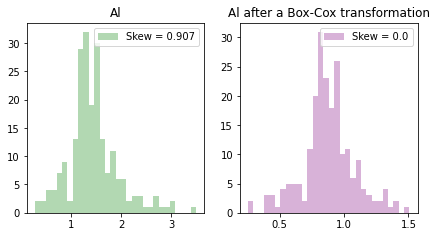

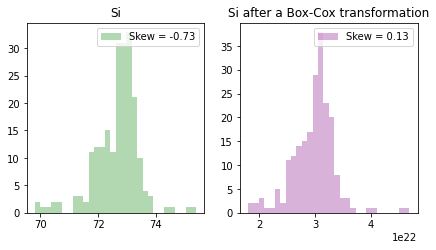

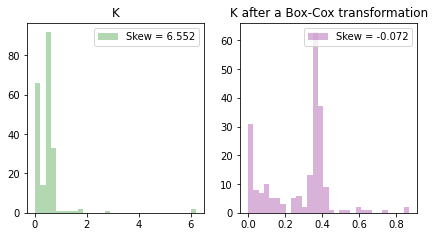

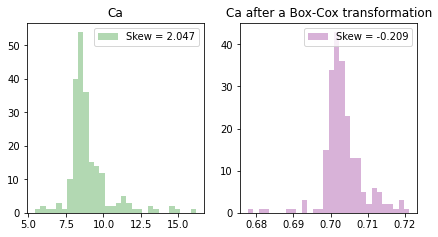

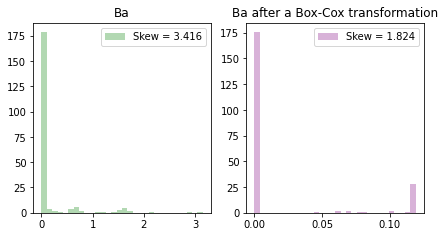

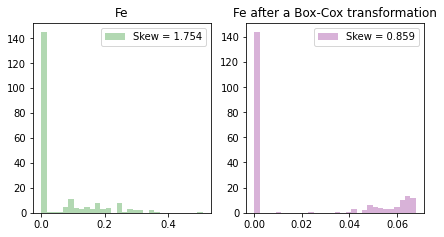

In [26]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(glasses[feature], color='green', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glasses[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(glasses_bc[feature], color='purple', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glasses_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Glass_type',axis=1))
Scaled = scaler.transform(df.drop('Glass_type',axis=1))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_Eu = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
knn_Eu.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [29]:
y_pred = knn_Eu.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 5, 1, 2, 2, 2, 5, 2, 2, 5, 2, 1,
       2, 7, 2, 7, 1, 5, 1, 1, 7, 2, 3, 2, 1, 7, 2, 1, 2, 1, 1, 7, 5])

In [30]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 8,  1,  2,  0,  0,  0],
       [ 8, 11,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  5]])

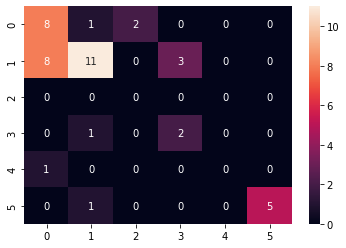

In [31]:
sns.heatmap(conf_matrix, annot=True)

In [32]:
from sklearn.metrics import classification_report,f1_score,accuracy_score
accuracy_score(y_test, y_pred)

0.6046511627906976

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.47      0.73      0.57        11
           2       0.79      0.50      0.61        22
           3       0.00      0.00      0.00         0
           5       0.40      0.67      0.50         3
           6       0.00      0.00      0.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.60        43
   macro avg       0.44      0.45      0.43        43
weighted avg       0.69      0.60      0.62        43



*MANHATTAN DISTANCE*

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_Mn = KNeighborsClassifier(n_neighbors=11,p=2,metric='manhattan')
knn_Mn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [35]:
y_pred = knn_Mn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 5, 1, 2, 2, 7, 5, 2, 2, 5, 2, 1,
       2, 7, 2, 7, 1, 5, 1, 2, 7, 2, 3, 2, 1, 7, 2, 1, 2, 1, 1, 7, 5])

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 9,  1,  1,  0,  0,  0],
       [ 7, 12,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  5]])

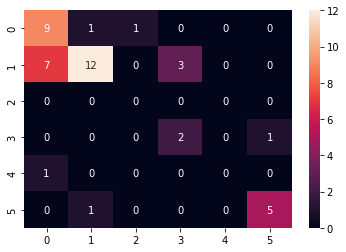

In [37]:
sns.heatmap(conf_matrix, annot=True)

In [38]:
from sklearn.metrics import classification_report,f1_score,accuracy_score
accuracy_score(y_test, y_pred)

0.6511627906976745

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.53      0.82      0.64        11
           2       0.86      0.55      0.67        22
           3       0.00      0.00      0.00         0
           5       0.40      0.67      0.50         3
           6       0.00      0.00      0.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.65        43
   macro avg       0.44      0.48      0.44        43
weighted avg       0.72      0.65      0.66        43

